In [1]:
%matplotlib inline

import json
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from functools import reduce
from matplotlib.ticker import FuncFormatter


DAMORE = '@Fired4Truth'
DATA_DIR = os.path.join("data", "clean")

sns.set_palette(sns.xkcd_palette(["windows blue", "amber", "greyish"]))
NORMAL, HIGHLIGHT, TEXT = sns.color_palette()
THOUSANDS_FORMATTER = FuncFormatter(lambda x, p: format(int(x), ','))
PERCENT_FORMATTER = FuncFormatter(lambda x, p: "{:3.0f}%".format(x*100))

sns.set_context('poster')
sns.set_style('white')

In [2]:
def mutual_followers(followers, ego, *screen_names):
    return reduce(lambda acc, k: followers[k] & acc, 
                  screen_names, 
                  followers[ego])

test_followers = {'a': {1, 2, 3}, 'b': {2, 3, 4}, 'c': {3, 4, 5}}
assert mutual_followers(test_followers, 'a') == {1, 2, 3}
assert mutual_followers(test_followers, 'a', 'b') == {2, 3}
assert mutual_followers(test_followers, 'a', 'b', 'c') == {3}


def load_followers(data_dir=DATA_DIR):
    followers = {}

    for name in os.listdir(DATA_DIR):
        if name.endswith(".json"):
            with open(os.path.join(DATA_DIR, name)) as fp:
                screen_name = '@' + name.replace(".json", "")
                followers[screen_name] = set(json.load(fp))
    
    return followers


def create_annotated_df(followers, target=DAMORE, others=None):
    others = others or []
    followers = load_followers()
    
    n_followers = {k: len(mutual_followers(followers, k, *others))
                   for k in followers}
    df = pd.DataFrame({'n_followers': pd.Series(n_followers)})
    
    df['mutual_followers'] = [len(mutual_followers(followers, target, k, *others)) 
                              for k in df.index]    

    df['mutual_proportion'] = df['mutual_followers'] / n_followers[target]
    
    return df


def sort_and_highlight(df, title, k, highlight_set, formatter):
    fig, ax = plt.subplots()

    df = df.sort_values(by=k)

    colors = [HIGHLIGHT if k in highlight_set else NORMAL 
              for k in df.index]

    # Cheap hack. Couldn't get pandas do multiple colors.
    df[k].plot(kind='barh')
    plt.barh(range(df.shape[0]), 
             df[k], 
             height=0.6, 
             color=colors)

    plt.title(title)
    ax.xaxis.set_major_formatter(formatter)
    sns.despine()
    return fig, ax

In [3]:
followers = load_followers()
df = create_annotated_df(followers)
df

,n_followers,mutual_followers,mutual_proportion
@Cernovich,332172,28429,0.382728
@Fired4Truth,74280,74280,1.000000
@JackPosobiec,187770,21366,0.287641
@PrisonPlanet,681727,37952,0.510932
@TechCrunch,9527314,5147,0.069292
@basedstickman_,30455,6519,0.087763
@getongab,53046,11882,0.159962
@marissamayer,1711976,1785,0.024031
@richardbspencer,72560,7731,0.104079
@sapinker,333143,6258,0.084249


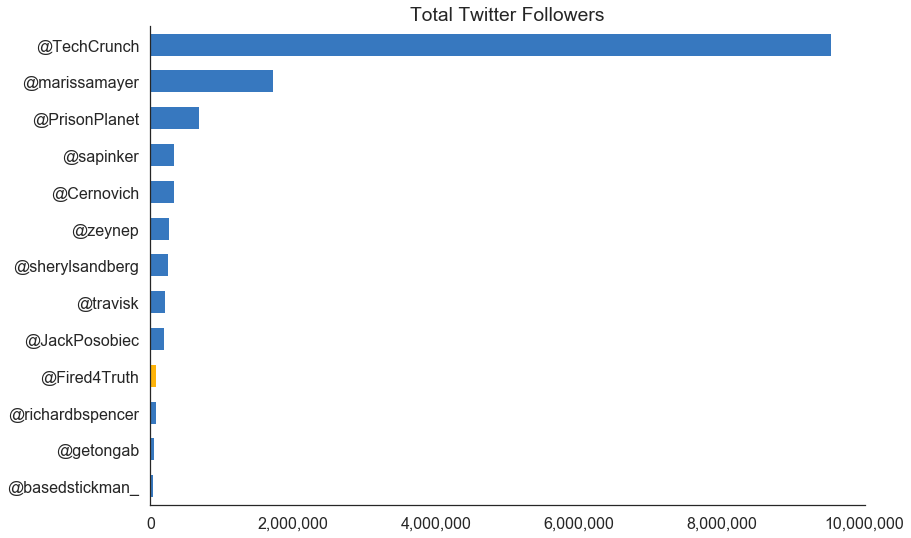

In [4]:
sort_and_highlight(df, 
                   'Total Twitter Followers', 
                   'n_followers', 
                   {DAMORE}, 
                   THOUSANDS_FORMATTER);

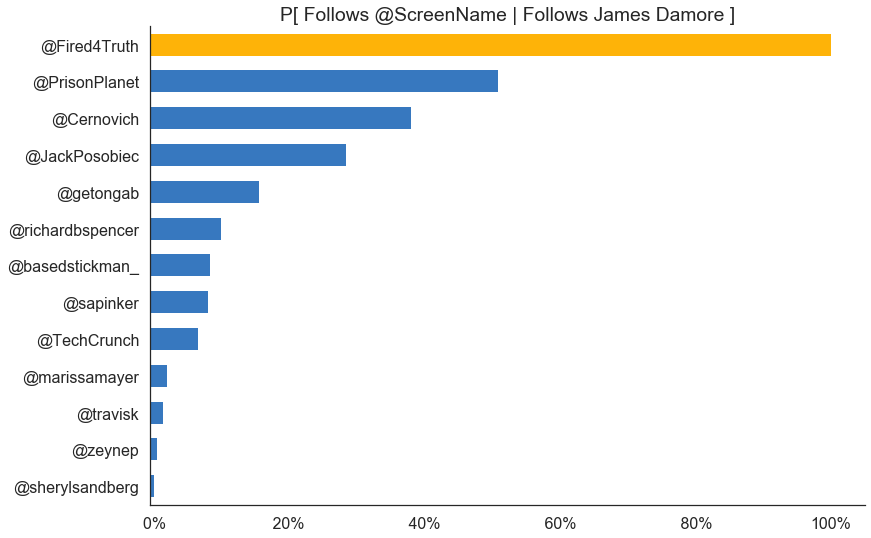

In [5]:
sort_and_highlight(df, 
                   'P[ Follows @ScreenName | Follows James Damore ]', 
                   'mutual_proportion', 
                   {DAMORE}, PERCENT_FORMATTER);

In [6]:
followers = load_followers()
sub_df = create_annotated_df(followers, target='@Fired4Truth', others=['@TechCrunch'])
sub_df

,n_followers,mutual_followers,mutual_proportion
@Cernovich,25300,1978,0.384302
@Fired4Truth,5147,5147,1.000000
@JackPosobiec,11791,1444,0.280552
@PrisonPlanet,38920,2294,0.445697
@TechCrunch,9527314,5147,1.000000
@basedstickman_,1201,344,0.066835
@getongab,3356,810,0.157373
@marissamayer,728859,968,0.188071
@richardbspencer,4647,490,0.095201
@sapinker,57839,881,0.171168


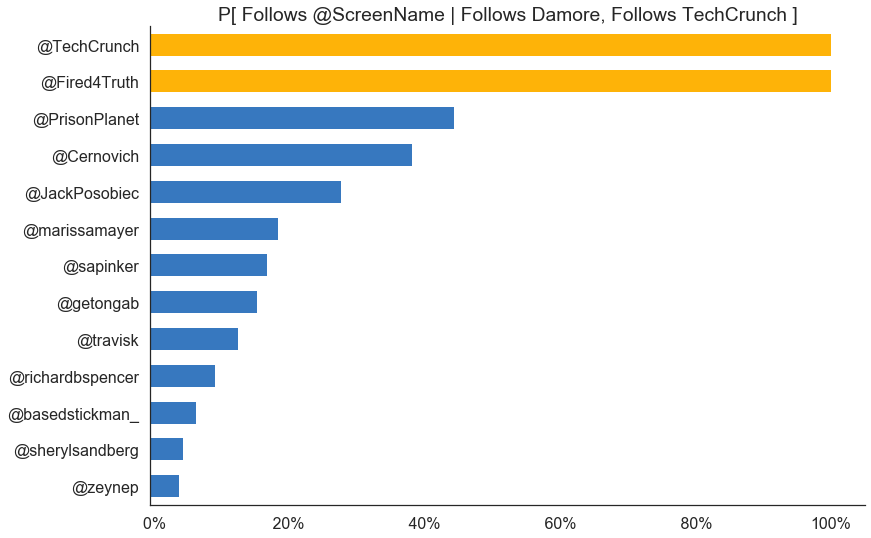

In [7]:
sort_and_highlight(sub_df, 
                   'P[ Follows @ScreenName | Follows Damore, Follows TechCrunch ]', 
                   'mutual_proportion', 
                   {DAMORE, '@TechCrunch'}, 
                   PERCENT_FORMATTER);

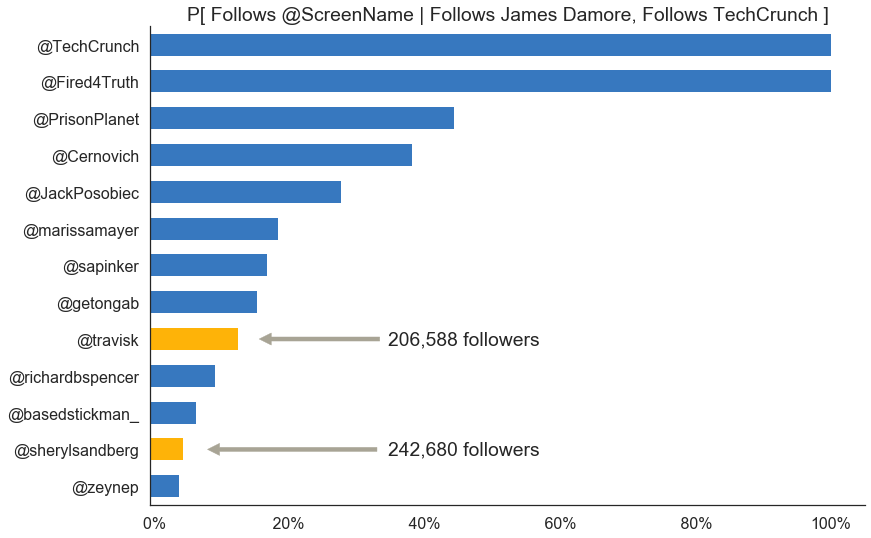

In [8]:
fig, ax = sort_and_highlight(sub_df, 
                   'P[ Follows @ScreenName | Follows James Damore, Follows TechCrunch ]', 
                   'mutual_proportion', 
                   {'@travisk', '@sherylsandberg'}, 
                   PERCENT_FORMATTER)

ax.annotate('206,588 followers', xy=(0.15, 4), xytext=(0.35, 4),
            verticalalignment='center',
            arrowprops=dict(facecolor=TEXT, edgecolor=TEXT, shrink=0.05))


ax.annotate('242,680 followers', xy=(0.07, 1), xytext=(0.35, 1),
            verticalalignment='center',
            arrowprops=dict(facecolor=TEXT, edgecolor=TEXT, shrink=0.05));

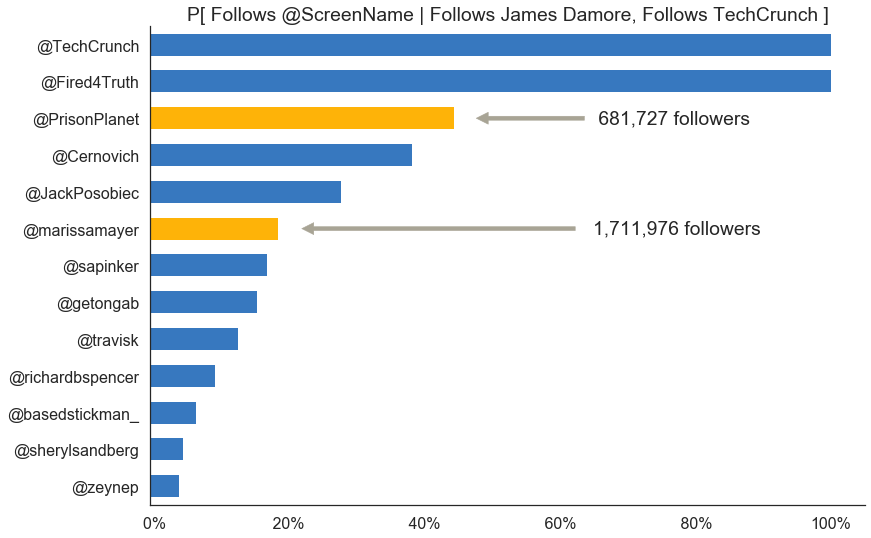

In [9]:
fig, ax = sort_and_highlight(sub_df, 
                   'P[ Follows @ScreenName | Follows James Damore, Follows TechCrunch ]', 
                   'mutual_proportion', 
                   {'@marissamayer', '@PrisonPlanet'}, 
                   PERCENT_FORMATTER)

ax.annotate(' 681,727 followers', xy=(0.47, 10), xytext=(0.65, 10),
            verticalalignment='center',
            arrowprops=dict(facecolor=TEXT, edgecolor=TEXT, shrink=0.05))


ax.annotate('1,711,976 followers', xy=(0.2, 7), xytext=(0.65, 7),
            verticalalignment='center',
            arrowprops=dict(facecolor=TEXT, edgecolor=TEXT, shrink=0.05));